In [152]:
import pandas as pd
import numpy as np
df1 = pd.read_csv('/home/ustudent/Desktop/220962049_aiml_a1/lab3/hepatitis_csv.csv')
df=df1

# Q1

In [153]:
for x in df.columns:
    print(x,df[x].isna().sum())

age 0
sex 0
steroid 1
antivirals 0
fatigue 1
malaise 1
anorexia 1
liver_big 10
liver_firm 11
spleen_palpable 5
spiders 5
ascites 5
varices 5
bilirubin 6
alk_phosphate 29
sgot 4
albumin 16
protime 67
histology 0
class 0


In [154]:
df['sex'] = df['sex'].replace({'male': 1, 'female': 0})

In [155]:
columns_list = ['steroid','antivirals','fatigue','malaise','anorexia','liver_big','liver_firm','spleen_palpable','spiders','ascites','varices','histology']
for x in columns_list:
    df[x] = df[x].replace({True: 1, False: 0})

In [156]:
df['class']=df['class'].replace({'live':1,'die':0})

In [157]:
df.drop(columns=['protime'],inplace=True)

In [158]:
for x in df.columns:
    print(x,df[x].isna().sum())

age 0
sex 0
steroid 1
antivirals 0
fatigue 1
malaise 1
anorexia 1
liver_big 10
liver_firm 11
spleen_palpable 5
spiders 5
ascites 5
varices 5
bilirubin 6
alk_phosphate 29
sgot 4
albumin 16
histology 0
class 0


In [159]:
correlation_matrix = df.corr()
print(correlation_matrix)

                      age       sex   steroid  antivirals   fatigue   malaise  \
age              1.000000  0.008126 -0.085732    0.013100  0.282223  0.115236   
sex              0.008126  1.000000 -0.046989    0.089249  0.071822  0.028820   
steroid         -0.085732 -0.046989  1.000000   -0.060101 -0.164326 -0.242942   
antivirals       0.013100  0.089249 -0.060101    1.000000 -0.059445 -0.018540   
fatigue          0.282223  0.071822 -0.164326   -0.059445  1.000000  0.595142   
malaise          0.115236  0.028820 -0.242942   -0.018540  0.595142  1.000000   
anorexia        -0.090394 -0.017030 -0.074380   -0.043552  0.376350  0.599647   
liver_big       -0.105480 -0.072336  0.214488   -0.042350 -0.112892 -0.057090   
liver_firm       0.109382  0.059761 -0.086463    0.075593  0.272435  0.118382   
spleen_palpable  0.074853  0.055556 -0.077071   -0.172756  0.195256  0.013690   
spiders          0.179997  0.042220 -0.028675   -0.159695  0.383333  0.325979   
ascites          0.066220 -0

In [160]:
target_corr = correlation_matrix['age']
lower_bound = -0.15
upper_bound = 0.15
target_column='age'
to_drop = [column for column in target_corr.index if column != target_column and lower_bound <= target_corr[column] <= upper_bound]
df.drop(columns=to_drop,inplace=True)
df

,age,fatigue,spiders,albumin,histology,class
0,30,0.0,0.0,4.0,0,1
1,50,1.0,0.0,3.5,0,1
2,78,1.0,0.0,4.0,0,1
3,31,0.0,0.0,4.0,0,1
4,34,0.0,0.0,4.0,0,1
...,...,...,...,...,...,...
150,46,1.0,1.0,3.3,1,0
151,44,1.0,0.0,4.3,1,1
152,61,1.0,1.0,4.1,1,1
153,53,1.0,1.0,4.1,1,1


In [161]:
df = df.dropna()

In [162]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
y=df['age']
X = df[['fatigue', 'spiders', 'albumin', 'histology', 'class']]

In [163]:
shuffled_indices = np.arange(X.shape[0])
np.random.shuffle(shuffled_indices)
train_size = int(0.8 * X.shape[0])  
test_size = X.shape[0] - train_size  
train_indices = shuffled_indices[:train_size]
test_indices = shuffled_indices[train_size:]
X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

# Q2

In [164]:
data = {
    'Study Time': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Score': [2, 3, 5, 6, 7, 8, 7, 9, 9, 10]
}
data=pd.DataFrame(data)
data.to_csv('study_time_scores.csv', index=False)

print("CSV file 'study_time_scores.csv' has been created.")

CSV file 'study_time_scores.csv' has been created.


Index(['Study Time', 'Score'], dtype='object')
Intercept (B0): 2.000000000000002
Slope (B1): 0.8363636363636364
RMSE: 0.6849021164304495


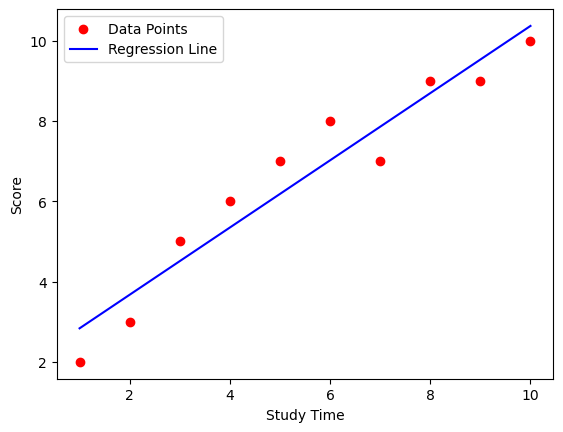

In [165]:
data = pd.read_csv('/home/ustudent/Desktop/220962049_aiml_a1/lab3/study_time_scores.csv')
print(data.columns)
x = data['Study Time'].values
y = data['Score'].values
X = np.vstack([np.ones_like(x), x]).T
B = np.linalg.inv(X.T @ X) @ X.T @ y
B0, B1 = B
y_pred = X @ B
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))
rmsse = rmse(y , y_pred)
print(f'Intercept (B0): {B0}')
print(f'Slope (B1): {B1}')
print(f'RMSE: {rmsse}')
plt.scatter(x, y, color='red', label='Data Points')
plt.plot(x, y_pred, color='blue', label='Regression Line')
plt.xlabel('Study Time')
plt.ylabel('Score')
plt.legend()
plt.show()

In [166]:
X = np.vstack([np.ones_like(x), x]).T

def gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    m = len(y)
    theta = np.random.randn(2)
    
    for iteration in range(epochs):
        predictions = X.dot(theta)
        errors = predictions - y
        gradients = (2/m) * X.T.dot(errors)
        theta -= learning_rate * gradients
        
    return theta

learning_rate = 0.01
epochs = 1000
theta = gradient_descent(X, y, learning_rate, epochs)

B0, B1 = theta

y_pred = X.dot(theta)

rmse = np.sqrt(np.mean((y - y_pred) ** 2))

print(f'Intercept (B0): {B0:.2f}')
print(f'Slope (B1): {B1:.2f}')
print(f'RMSE: {rmse:.2f}')
study_time_new = 10
X_new = np.array([1, study_time_new])
predicted_score = X_new.dot(theta)
print('for 10 hours',predicted_score)

Intercept (B0): 1.96
Slope (B1): 0.84
RMSE: 0.69
for 10 hours 10.382482504567774


# additional

Intercept (B0): 8.38
Slopes (B1): spiders      4.529825
albumin      8.421590
histology    5.705786
class       -1.607572
dtype: float64
Training RMSE: 13.11
Test RMSE: 13.07
Training R^2: -0.16
Test R^2: -0.48


/tmp/ipykernel_4919/916178959.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  B0 = theta[0]


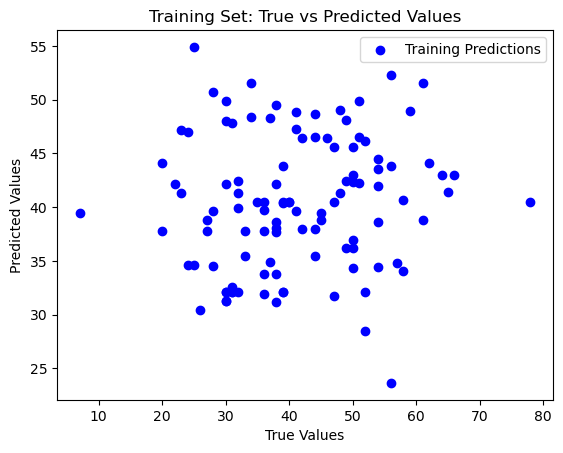

In [170]:
learning_rate = 0.01
n_iterations = 1000
def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m, n = X.shape
    theta = np.random.randn(n)  # Initialize theta with the correct shape
    
    for iteration in range(n_iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradients = (2/m) * X.T.dot(errors)
        theta -= learning_rate * gradients
        
    return theta

# Custom RMSE Function
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def r_squared(y_true, y_pred):
    y_mean = np.mean(y_true)
    tss = np.sum((y_true - y_mean) ** 2)
    rss = np.sum((y_true - y_pred) ** 2)
    return 1 - (rss / tss)

# Perform gradient descent
learning_rate = 0.01
n_iterations = 1000
theta = gradient_descent(X_train, y_train, learning_rate, n_iterations)

# Extract coefficients
B0 = theta[0]
B1 = theta[1:]

# Make predictions
y_train_pred = X_train.dot(theta)
y_test_pred = X_test.dot(theta)

# Calculate RMSE
train_rmse = rmse(y_train, y_train_pred)
test_rmse = rmse(y_test, y_test_pred)

# Calculate R^2
train_r2 = r_squared(y_train, y_train_pred)
test_r2 = r_squared(y_test, y_test_pred)

# Print results
print(f'Intercept (B0): {B0:.2f}')
print(f'Slopes (B1): {B1}')
print(f'Training RMSE: {train_rmse:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')
print(f'Training R^2: {train_r2:.2f}')
print(f'Test R^2: {test_r2:.2f}')

# Optional: Plot predictions vs true values (for training set)
plt.scatter(y_train, y_train_pred, color='blue', label='Training Predictions')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Training Set: True vs Predicted Values')
plt.legend()
plt.show()
